In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import rc
 
# 设置使用Times New Roman字体
rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rcParams['mathtext.fontset'] = 'stix'  # 用于更好的数学字体渲染

In [2]:
data = pd.read_csv(r'D:\my work\Causal theory\pisa数据\2022\CY08MSP_STU_QQQ_processed_Official-variables_add-ICTSCHPRD.csv')
data

,AGE,GRADE,GENDER,IMMIG,REPEAT,STUDYHMW,EXPECEDU,RELATST,FAMSUP,SCHSUST,...,ICTREG,ICTDISTR,ICTEFFIC,PQSCHOOL,PAREXPT,Achievement,ICTSCHPRD,ICTSTUDY,ICTLEISURE,ICTUSE
0,15.83,-2,1,1,1,10,4,1.8580,-0.7468,1.538200,...,2.8904,12,0.007389,-0.000061,9,809.6578,1,0.495550,0.070993,5
1,16.33,0,1,1,0,10,9,1.7382,-0.5122,0.224100,...,2.0196,13,-0.235400,-0.000061,9,1429.1773,1,0.603467,0.070993,5
2,15.75,0,1,1,0,10,3,0.3802,-0.7563,-0.825600,...,2.8904,12,1.061300,-0.000061,9,1098.2520,1,1.321650,0.070993,5
3,15.75,0,2,1,0,10,3,1.2781,1.7495,-1.039100,...,0.8842,13,-0.824300,-0.000061,9,1057.3735,1,-0.521175,0.070993,5
4,15.92,0,1,1,0,10,8,0.8934,1.8705,1.385100,...,0.4704,4,0.526200,-0.000061,9,1565.6570,1,0.266275,0.070993,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256487,15.83,0,2,1,0,6,7,-0.4508,-0.1426,0.076995,...,1.0594,8,2.201200,-0.000061,9,1287.0660,1,0.686500,1.646050,5
256488,15.83,0,2,3,0,2,9,0.7770,0.1689,0.076995,...,-0.5927,9,-0.085100,-0.000061,9,1701.2470,1,-0.257750,-0.081300,5
256489,15.92,0,2,1,0,3,6,1.1046,-0.1921,-0.806000,...,1.0594,4,0.100300,-0.000061,9,1066.7971,1,0.392150,1.013850,2
256490,15.42,-1,2,1,1,10,9,-0.2467,-0.9684,0.419900,...,0.5826,12,-0.726200,-0.000061,9,1073.4483,1,-0.617625,0.245700,3


In [3]:
features_for_clustering = data.columns.drop(['GENDER','ICTSCHPRD', 'ICTUSE', 'ICTQUAL', 'ICTREG', 'ICTDISTR', 'ICTEFFIC', 'ICTSTUDY', 'ICTLEISURE', 'ICTRES', 'Achievement'])
# features_for_clustering = data.columns.drop(['ICTSCHPRD', 'ICTUSE'])
data_for_clustering = data[features_for_clustering]
data_for_clustering

,AGE,GRADE,IMMIG,REPEAT,STUDYHMW,EXPECEDU,RELATST,FAMSUP,SCHSUST,PAREDINT,HISEI,HOMEPOS,ESCS,PQSCHOOL,PAREXPT
0,15.83,-2,1,1,10,4,1.8580,-0.7468,1.538200,6.0,14.82,-2.5956,-3.2198,-0.000061,9
1,16.33,0,1,0,10,9,1.7382,-0.5122,0.224100,12.0,30.11,-0.5632,-1.0548,-0.000061,9
2,15.75,0,1,0,10,3,0.3802,-0.7563,-0.825600,12.0,30.11,-0.8342,-1.1697,-0.000061,9
3,15.75,0,1,0,10,3,1.2781,1.7495,-1.039100,9.0,17.00,-2.3875,-2.5828,-0.000061,9
4,15.92,0,1,0,10,8,0.8934,1.8705,1.385100,16.0,80.92,-0.1753,0.7457,-0.000061,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256487,15.83,0,1,0,6,7,-0.4508,-0.1426,0.076995,16.0,31.08,0.2253,-0.0256,-0.000061,9
256488,15.83,0,3,0,2,9,0.7770,0.1689,0.076995,16.0,88.31,-0.3852,0.7964,-0.000061,9
256489,15.92,0,1,0,3,6,1.1046,-0.1921,-0.806000,16.0,26.64,-2.6669,-1.3344,-0.000061,9
256490,15.42,-1,1,1,10,9,-0.2467,-0.9684,0.419900,12.0,22.57,-1.5955,-1.6344,-0.000061,9


In [4]:
# 数据标准化  
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()  
data_for_clustering = scaler.fit_transform(data_for_clustering)
data_for_clustering = pd.DataFrame(data_for_clustering, columns=features_for_clustering)
data_for_clustering

,AGE,GRADE,IMMIG,REPEAT,STUDYHMW,EXPECEDU,RELATST,FAMSUP,SCHSUST,PAREDINT,HISEI,HOMEPOS,ESCS,PQSCHOOL,PAREXPT
0,0.140020,-3.759745,-0.322332,3.683537,1.363626,-1.411908,1.910256,-0.744704,1.606925e+00,-3.115977,-1.695311,-2.346914,-3.017411,-3.287288e-15,0.339062
1,1.861068,0.101015,-0.322332,-0.271478,1.363626,1.022455,1.785379,-0.510691,1.617751e-01,-0.792645,-1.010637,-0.364443,-0.904718,-3.287288e-15,0.339062
2,-0.135348,0.101015,-0.322332,-0.271478,1.363626,-1.898781,0.369835,-0.754180,-9.926070e-01,-0.792645,-1.010637,-0.628786,-1.016842,-3.287288e-15,0.339062
3,-0.135348,0.101015,-0.322332,-0.271478,1.363626,-1.898781,1.305783,1.745345,-1.227398e+00,-1.954311,-1.597692,-2.143926,-2.395801,-3.287288e-15,0.339062
4,0.449808,0.101015,-0.322332,-0.271478,1.363626,0.535582,0.904781,1.866042,1.438557e+00,0.756244,1.264595,0.013927,0.852282,-3.287288e-15,0.339062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256487,0.140020,0.101015,-0.322332,-0.271478,0.095364,0.048710,-0.496379,-0.142017,1.220941e-15,0.756244,-0.967201,0.404686,0.099617,-3.287288e-15,0.339062
256488,0.140020,0.101015,4.048337,-0.271478,-1.172898,1.022455,0.783449,0.168703,1.220941e-15,0.756244,1.595513,-0.190816,0.901757,-3.287288e-15,0.339062
256489,0.449808,0.101015,-0.322332,-0.271478,-0.855833,-0.438163,1.124931,-0.191393,-9.710524e-01,0.756244,-1.166021,-2.416462,-1.177562,-3.287288e-15,0.339062
256490,-1.271241,-1.829365,-0.322332,3.683537,1.363626,1.022455,-0.283630,-0.965749,3.771014e-01,-0.792645,-1.348272,-1.371383,-1.470314,-3.287288e-15,0.339062


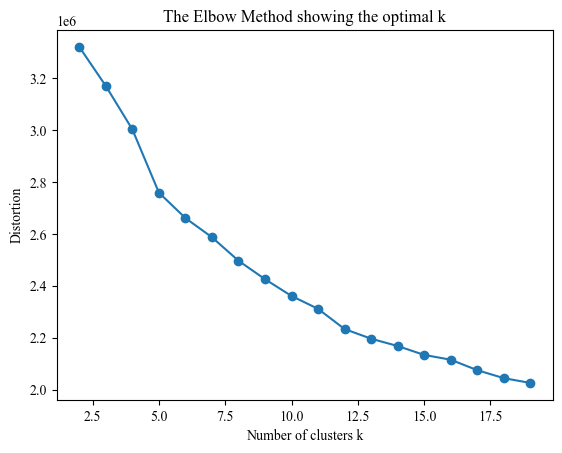

In [5]:
range_n_clusters = range(2, 20)  # 考虑的聚类数范围
# n_init = 20  # 初始化次数

distortions = []

for n_clusters in range_n_clusters:
    # 创建KMeans实例，设置初始化次数和随机种子
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=2)
    cluster_labels = clusterer.fit_predict(data_for_clustering)
    
    # 计算失真（inertia）
    distortions.append(clusterer.inertia_)

# 绘制肘部法图
plt.plot(range_n_clusters, distortions, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

C:\Users\jcydwx\AppData\Local\Temp\ipykernel_10984\2553880526.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range_n_clusters, distortions, 'bo-', marker='o', color='skyblue', markerfacecolor='red', markersize=8, linewidth=2)
C:\Users\jcydwx\AppData\Local\Temp\ipykernel_10984\2553880526.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range_n_clusters, distortions, 'bo-', marker='o', color='skyblue', markerfacecolor='red', markersize=8, linewidth=2)


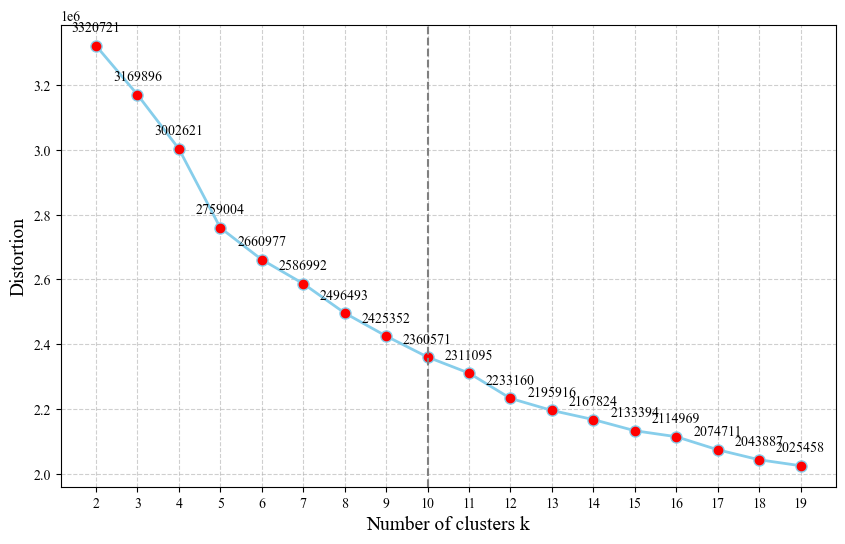

In [6]:
range_n_clusters = range(2, 20)  # 考虑的聚类数范围

distortions = []

for n_clusters in range_n_clusters:
    # 创建KMeans实例，设置初始化次数和随机种子
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=2)
    clusterer.fit(data_for_clustering)
    
    # 计算失真（inertia）
    distortions.append(clusterer.inertia_)

# 优化肘部法图的绘制
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, distortions, 'bo-', marker='o', color='skyblue', markerfacecolor='red', markersize=8, linewidth=2)
plt.xticks(np.arange(min(range_n_clusters), max(range_n_clusters) + 1, 1))  # 设置x轴为整数刻度
plt.xlabel('Number of clusters k', fontsize=14)
plt.ylabel('Distortion', fontsize=14)
# plt.title('The Elbow Method showing the optimal k', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(x=10, color='gray', linestyle='--', linewidth=1.5)  # 假设3是最佳的k值，根据实际情况调整
# plt.axvline(x=5, color='gray', linestyle='--', linewidth=1.5)  # 可以标注多个可能的最佳k值
for i, txt in enumerate(distortions):
    plt.annotate(f'{txt:.0f}', (range_n_clusters[i], distortions[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)  # 标注每个点的数值
plt.show()


In [7]:
# 使用确定的K值进行聚类  
optimal_k = 10  # 假设通过肘部法则确定的最佳K值为10  
kmeans = KMeans(n_clusters=optimal_k, random_state=2)
labels = kmeans.fit_predict(data_for_clustering)

# 将聚类标签添加到原始数据框中
# data_with_clusters = pd.DataFrame(data_for_clustering, columns=[f'Feature_{i+1}' for i in range(data_for_clustering.shape[1])])
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = labels
data_with_clusters

,AGE,GRADE,GENDER,IMMIG,REPEAT,STUDYHMW,EXPECEDU,RELATST,FAMSUP,SCHSUST,...,ICTDISTR,ICTEFFIC,PQSCHOOL,PAREXPT,Achievement,ICTSCHPRD,ICTSTUDY,ICTLEISURE,ICTUSE,Cluster
0,15.83,-2,1,1,1,10,4,1.8580,-0.7468,1.538200,...,12,0.007389,-0.000061,9,809.6578,1,0.495550,0.070993,5,5
1,16.33,0,1,1,0,10,9,1.7382,-0.5122,0.224100,...,13,-0.235400,-0.000061,9,1429.1773,1,0.603467,0.070993,5,0
2,15.75,0,1,1,0,10,3,0.3802,-0.7563,-0.825600,...,12,1.061300,-0.000061,9,1098.2520,1,1.321650,0.070993,5,9
3,15.75,0,2,1,0,10,3,1.2781,1.7495,-1.039100,...,13,-0.824300,-0.000061,9,1057.3735,1,-0.521175,0.070993,5,2
4,15.92,0,1,1,0,10,8,0.8934,1.8705,1.385100,...,4,0.526200,-0.000061,9,1565.6570,1,0.266275,0.070993,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256487,15.83,0,2,1,0,6,7,-0.4508,-0.1426,0.076995,...,8,2.201200,-0.000061,9,1287.0660,1,0.686500,1.646050,5,0
256488,15.83,0,2,3,0,2,9,0.7770,0.1689,0.076995,...,9,-0.085100,-0.000061,9,1701.2470,1,-0.257750,-0.081300,5,3
256489,15.92,0,2,1,0,3,6,1.1046,-0.1921,-0.806000,...,4,0.100300,-0.000061,9,1066.7971,1,0.392150,1.013850,2,9
256490,15.42,-1,2,1,1,10,9,-0.2467,-0.9684,0.419900,...,12,-0.726200,-0.000061,9,1073.4483,1,-0.617625,0.245700,3,5


In [8]:
# 计算每个聚类的平均值
cluster_means = data_with_clusters.groupby('Cluster').mean()

# 计算每个聚类的中位数
cluster_medians = data_with_clusters.groupby('Cluster').median()

# 将平均值和中位数打印出来查看
print("Cluster Means:\n", cluster_means)
print("\nCluster Medians:\n", cluster_medians)


Cluster Means:
                AGE     GRADE    GENDER     IMMIG    REPEAT  STUDYHMW  \
Cluster                                                                
0        15.814057  0.069571  1.412601  1.005354  0.000211  7.822301   
1        15.782303 -0.072584  1.531420  1.097703  0.051578  5.317333   
2        15.817170 -0.026857  1.446261  1.029117  0.007305  5.947758   
3        15.779885  0.003566  1.475773  2.499086  0.032364  5.742549   
4        15.792250  0.050828  1.444508  1.013309  0.003511  7.341849   
5        15.794193 -0.944647  1.588188  1.265892  0.998208  5.536356   
6        15.789932 -0.073234  1.469582  2.371937  0.014608  5.866122   
7        16.055559  0.198707  1.487891  1.004159  0.002115  5.098724   
8        15.516847 -0.156300  1.488567  1.001611  0.000545  5.276320   
9        15.757596 -0.054793  1.557617  1.009960  0.000027  3.337763   

         EXPECEDU   RELATST    FAMSUP   SCHSUST  ...    ICTREG  ICTDISTR  \
Cluster                                    

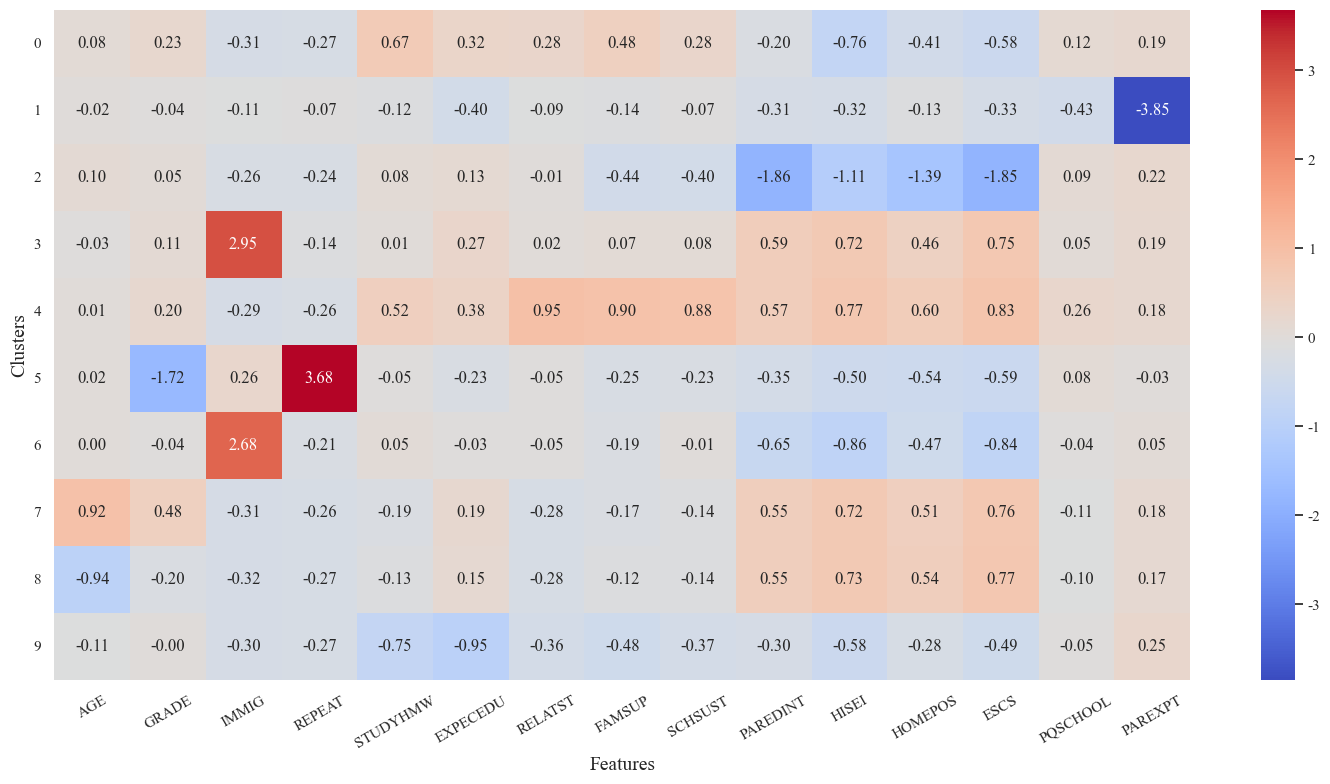

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置中文字体和英文字体
plt.rcParams['font.sans-serif'] = ['SimSun']  # 中文字体宋体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体Times New Roman
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 聚类中心
centroids = kmeans.cluster_centers_

# 创建DataFrame以便输出
centroids_df = pd.DataFrame(centroids, columns=features_for_clustering)

# 使用热力图显示聚类中心的特征值
plt.figure(figsize=(15, 8))
sns.heatmap(centroids, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=features_for_clustering)
# sns.heatmap(centroids, annot=True, fmt=".2f", cmap='coolwarm', 
#             xticklabels=features_for_clustering, linewidths=0.5, linecolor='gray',
#             cbar_kws={"shrink": 0.8, "orientation": "vertical"})  # 增加线宽和颜色设置
# plt.title('Heatmap of Cluster Centroids')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Clusters', fontsize=14)
plt.xticks(rotation=30)  # 调整x轴标签旋转角度和对齐方式
plt.yticks(rotation=0)  # y轴标签保持水平显示
plt.tight_layout()  # 自动调整子图参数以填充整个图形区域
plt.savefig('heatmap_cluster_centroids.png', dpi=300)  # 保存图片
plt.show()


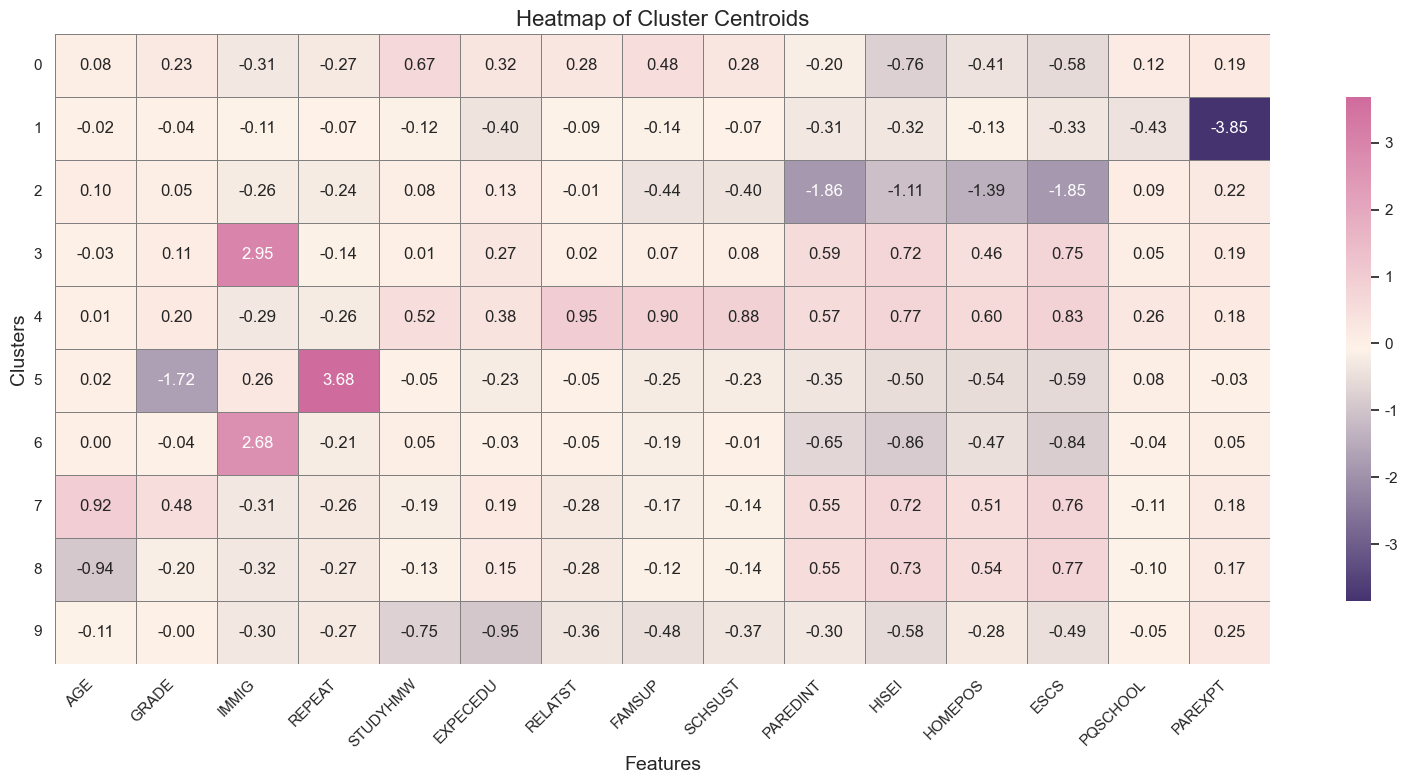

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

def create_custom_cmap(colors):
    """
    根据给定的 RGB 颜色列表创建一个自定义颜色映射。
    
    参数：
    colors: list of tuple
        包含 RGB 颜色的列表，例如 [(0.1, 0.2, 0.5), (0.5, 0.7, 0.2), (0.9, 0.1, 0.1)]。
    
    返回：
    cmap: LinearSegmentedColormap
        自定义颜色映射对象。
    """
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap

def plot_cluster_centroids(centroids, features, cmap='coolwarm'):
    """
    绘制聚类中心的热力图。

    参数：
    centroids: array-like, shape = [n_clusters, n_features]
        聚类中心的坐标值。
    features: list of str
        聚类中心的特征名称。
    cmap: str or LinearSegmentedColormap, optional, default: 'coolwarm'
        热力图的颜色映射，可以是字符串或自定义的颜色映射对象。
    """
    # 创建DataFrame以便输出
    centroids_df = pd.DataFrame(centroids, columns=features)

    # 设置热力图的画布大小和样式
    plt.figure(figsize=(16, 8))
    sns.set(style="whitegrid")  # 设置样式
    heatmap = sns.heatmap(centroids_df, annot=True, fmt=".2f", cmap=cmap, 
                          xticklabels=features, linewidths=0.5, linecolor='gray',
                          cbar_kws={"shrink": 0.8, "orientation": "vertical"})  # 增加线宽和颜色设置
    heatmap.set_title('Heatmap of Cluster Centroids', fontsize=16)
    heatmap.set_xlabel('Features', fontsize=14)
    heatmap.set_ylabel('Clusters', fontsize=14)
    
    plt.xticks(rotation=45, ha='right')  # 调整x轴标签旋转角度和对齐方式
    plt.yticks(rotation=0)  # y轴标签保持水平显示
    plt.tight_layout()  # 自动调整子图参数以填充整个图形区域
    plt.show()

# 示例调用方法
# 定义自定义 RGB 颜色列表
custom_colors = [
    (69/255, 51/255, 112/255),  # 深蓝色
    (254/255, 243/255, 232/255),  # 绿色
    (208/255, 108/255, 157/255)   # 红色
]

# 创建自定义颜色映射
custom_cmap = create_custom_cmap(custom_colors)

# 调用绘图函数，使用自定义颜色映射
plot_cluster_centroids(centroids, features_for_clustering, cmap=custom_cmap)


In [11]:
from datetime import datetime

# 生成时间戳
timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

# 保存DataFrame到CSV文件
file_name = f'heatmap_{timestamp}.csv'
centroids_df.to_csv(file_name, index=False)

In [12]:
data_with_clusters['ICTUSE'] = np.where(data_with_clusters['ICTUSE'] == 5, 1, 0)
data_with_clusters

,AGE,GRADE,GENDER,IMMIG,REPEAT,STUDYHMW,EXPECEDU,RELATST,FAMSUP,SCHSUST,...,ICTDISTR,ICTEFFIC,PQSCHOOL,PAREXPT,Achievement,ICTSCHPRD,ICTSTUDY,ICTLEISURE,ICTUSE,Cluster
0,15.83,-2,1,1,1,10,4,1.8580,-0.7468,1.538200,...,12,0.007389,-0.000061,9,809.6578,1,0.495550,0.070993,1,5
1,16.33,0,1,1,0,10,9,1.7382,-0.5122,0.224100,...,13,-0.235400,-0.000061,9,1429.1773,1,0.603467,0.070993,1,0
2,15.75,0,1,1,0,10,3,0.3802,-0.7563,-0.825600,...,12,1.061300,-0.000061,9,1098.2520,1,1.321650,0.070993,1,9
3,15.75,0,2,1,0,10,3,1.2781,1.7495,-1.039100,...,13,-0.824300,-0.000061,9,1057.3735,1,-0.521175,0.070993,1,2
4,15.92,0,1,1,0,10,8,0.8934,1.8705,1.385100,...,4,0.526200,-0.000061,9,1565.6570,1,0.266275,0.070993,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256487,15.83,0,2,1,0,6,7,-0.4508,-0.1426,0.076995,...,8,2.201200,-0.000061,9,1287.0660,1,0.686500,1.646050,1,0
256488,15.83,0,2,3,0,2,9,0.7770,0.1689,0.076995,...,9,-0.085100,-0.000061,9,1701.2470,1,-0.257750,-0.081300,1,3
256489,15.92,0,2,1,0,3,6,1.1046,-0.1921,-0.806000,...,4,0.100300,-0.000061,9,1066.7971,1,0.392150,1.013850,0,9
256490,15.42,-1,2,1,1,10,9,-0.2467,-0.9684,0.419900,...,12,-0.726200,-0.000061,9,1073.4483,1,-0.617625,0.245700,0,5


In [13]:
from statsmodels.formula.api import logit
from scipy.stats import gaussian_kde, qmc


def estimate_conditional_probability(x_value, data, kde, num_trials=3, num_samples=4096): # 调整num_sample以平衡精度和性能
 
    probabilities = []
    for trial in range(num_trials):
        # 创建一个准随机数生成器
        sampler = qmc.Sobol(d=2, scramble=True)
        
        # 生成样本
        sample_w1_w2 = qmc.scale(sampler.random(n=num_samples), [data['ICTQUAL'].min(), data['ICTREG'].min()], [data['ICTQUAL'].max(), data['ICTREG'].max()])
        
        total_probability = 0
        total_weight = 0
        for w1, w2 in sample_w1_w2:
            density = kde.evaluate([w1, w2])[0]
            # 估计 Y = 1 的概率给定 X=x, W1=w1, W2=w2
            p_y_given_x_w1_w2 = model.predict(exog=dict(ICTSCHPRD=x_value, ICTQUAL=w1, ICTREG=w2))
            total_probability += p_y_given_x_w1_w2 * density
            total_weight += density
        probability = total_probability / total_weight
        probabilities.append(probability)
        print(f'第{trial+1}次trial的结果为{probability}')
    return np.mean(probabilities)  # 返回多次实验的平均概率

In [14]:
bin_labels = [i for i in range(10)]
bin_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
results = []
rows = []
for z_bin in bin_labels:
    bin_data = data_with_clusters[data_with_clusters['Cluster'] == z_bin]
    total_rows = len(bin_data)
    print(f'当前数据集为{z_bin}，共有数据{total_rows}条')
    # 建立逻辑回归模型
    model = logit("ICTUSE ~ ICTSCHPRD + ICTQUAL + ICTREG", data=bin_data).fit()

    # 显示模型结果
    print(model.summary())
    # 提取 ICTQUAL 和 ICTREG 的数据
    W_values = bin_data[['ICTQUAL', 'ICTREG']].values.T
    # 建立核密度估计对象
    kde = gaussian_kde(W_values)
    
    p_y_x1 = estimate_conditional_probability(1, data=bin_data, kde=kde)
    print(f"P(ICTUSE=1 | do(ICTSCHPRD=1)): {p_y_x1}")
    p_y_x0 = estimate_conditional_probability(0, data=bin_data, kde=kde)
    print(f"P(ICTUSE=1 | do(ICTSCHPRD=0)): {p_y_x0}")
    results.append((p_y_x1, p_y_x0))
    rows.append(total_rows)

当前数据集为0，共有数据37918条
Optimization terminated successfully.
         Current function value: 0.529449
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 ICTUSE   No. Observations:                37918
Model:                          Logit   Df Residuals:                    37914
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                 0.01664
Time:                        15:54:25   Log-Likelihood:                -20076.
converged:                       True   LL-Null:                       -20415.
Covariance Type:            nonrobust   LLR p-value:                5.707e-147
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2503      0.075     -3.346      0.001      -0.397      -0.104
ICTSCHPRD 

In [16]:
results, rows

([(0.7768718275833791, 0.43125192696283765),
  (0.7710678850355385, 0.5118747644218735),
  (0.6187477727722054, 0.36493773681580716),
  (0.8930017979642836, 0.5397863382204712),
  (0.8751713158098289, 0.39153753764271215),
  (0.7126917412673192, 0.4279090187464299),
  (0.8111384369876847, 0.48577724105952075),
  (0.8534146803103977, 0.5155440313811991),
  (0.8479870441525375, 0.5525592470373893),
  (0.7679476480836319, 0.47251092511612364)],
 [37918, 11187, 19027, 10938, 29905, 16187, 10405, 42077, 42201, 36647])

In [17]:
beta, gamma, theta, delta = 1, 0, 0, 0
evaluated_results = []
for p_y_x, p_y_x_prime in results:
    evaluated = (beta - theta) * p_y_x + (gamma - beta) * p_y_x_prime + theta
    evaluated_results.append(evaluated)
evaluated_results

[0.3456199006205415,
 0.25919312061366495,
 0.25381003595639823,
 0.3532154597438124,
 0.4836337781671167,
 0.28478272252088926,
 0.325361195928164,
 0.3378706489291986,
 0.2954277971151481,
 0.2954367229675083]

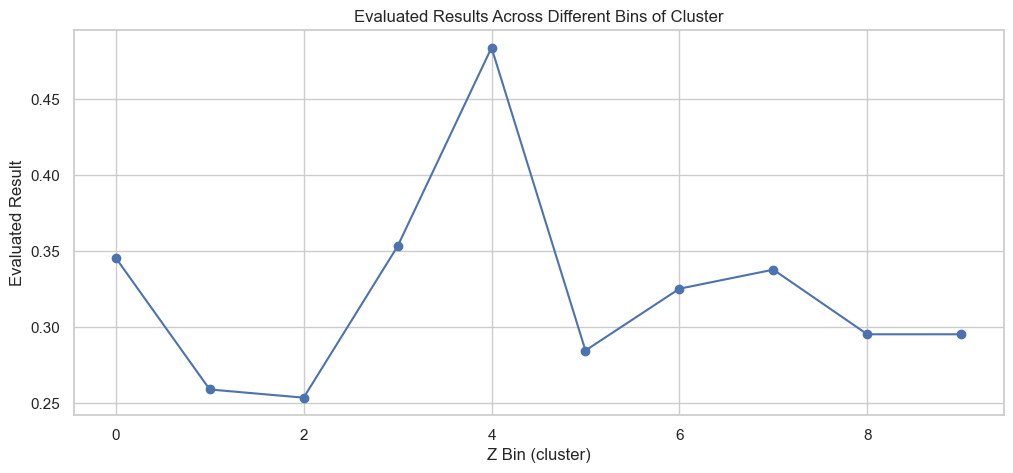

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(bin_labels, evaluated_results, marker='o')
plt.title('Evaluated Results Across Different Bins of Cluster')
plt.xlabel('Z Bin (cluster)')
plt.ylabel('Evaluated Result')
# plt.xticks(rotation=45)  # 旋转标签以获得更好的可视效果
plt.grid(True)
plt.show()

In [19]:
beta, gamma, theta, delta = 2, 1, -1, -2
evaluated_results = []
for p_y_x, p_y_x_prime in results:
    evaluated = (beta - theta) * p_y_x + (gamma - beta) * p_y_x_prime + theta
    evaluated_results.append(evaluated)
evaluated_results

[0.8993635557872999,
 0.8013288906847418,
 0.49130558150080916,
 1.1392190556723798,
 1.2339764097867745,
 0.7101662050555277,
 0.9476380699035334,
 1.0447000095499939,
 0.9914018854202231,
 0.831332019134772]

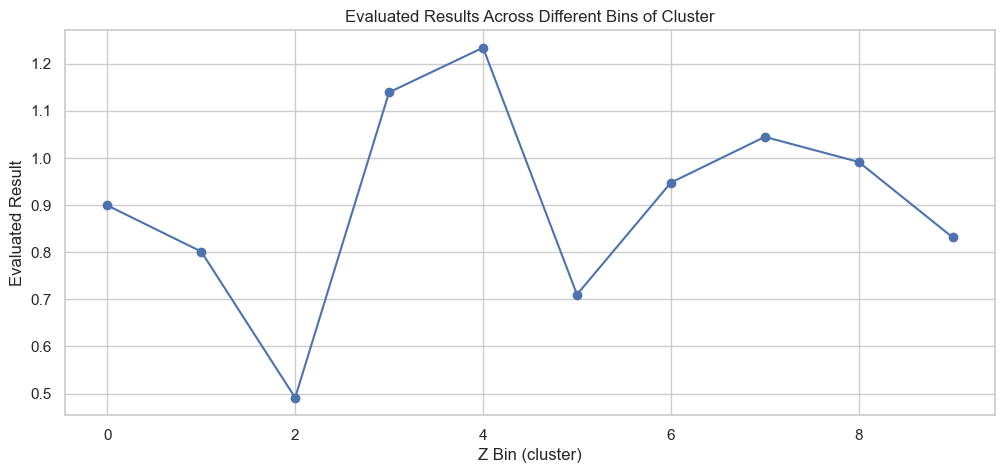

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(bin_labels, evaluated_results, marker='o')
plt.title('Evaluated Results Across Different Bins of Cluster')
plt.xlabel('Z Bin (cluster)')
plt.ylabel('Evaluated Result')
# plt.xticks(rotation=45)  # 旋转标签以获得更好的可视效果
plt.grid(True)
plt.show()

In [21]:
beta, gamma, theta, delta = 1, -1, -1, -1
evaluated_results = []
for p_y_x, p_y_x_prime in results:
    evaluated = (beta - theta) * p_y_x + (gamma - beta) * p_y_x_prime + theta
    evaluated_results.append(evaluated)
evaluated_results

[-0.308760198758917,
 -0.4816137587726701,
 -0.49237992808720354,
 -0.2935690805123752,
 -0.03273244366576655,
 -0.43043455495822147,
 -0.34927760814367204,
 -0.3242587021416028,
 -0.4091444057697038,
 -0.40912655406498344]

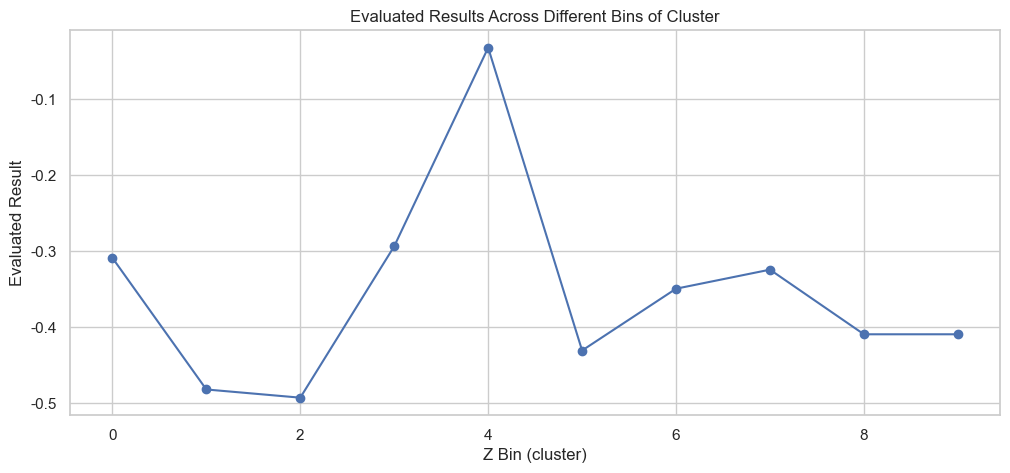

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(bin_labels, evaluated_results, marker='o')
plt.title('Evaluated Results Across Different Bins of Cluster')
plt.xlabel('Z Bin (cluster)')
plt.ylabel('Evaluated Result')
# plt.xticks(rotation=45)  # 旋转标签以获得更好的可视效果
plt.grid(True)
plt.show()

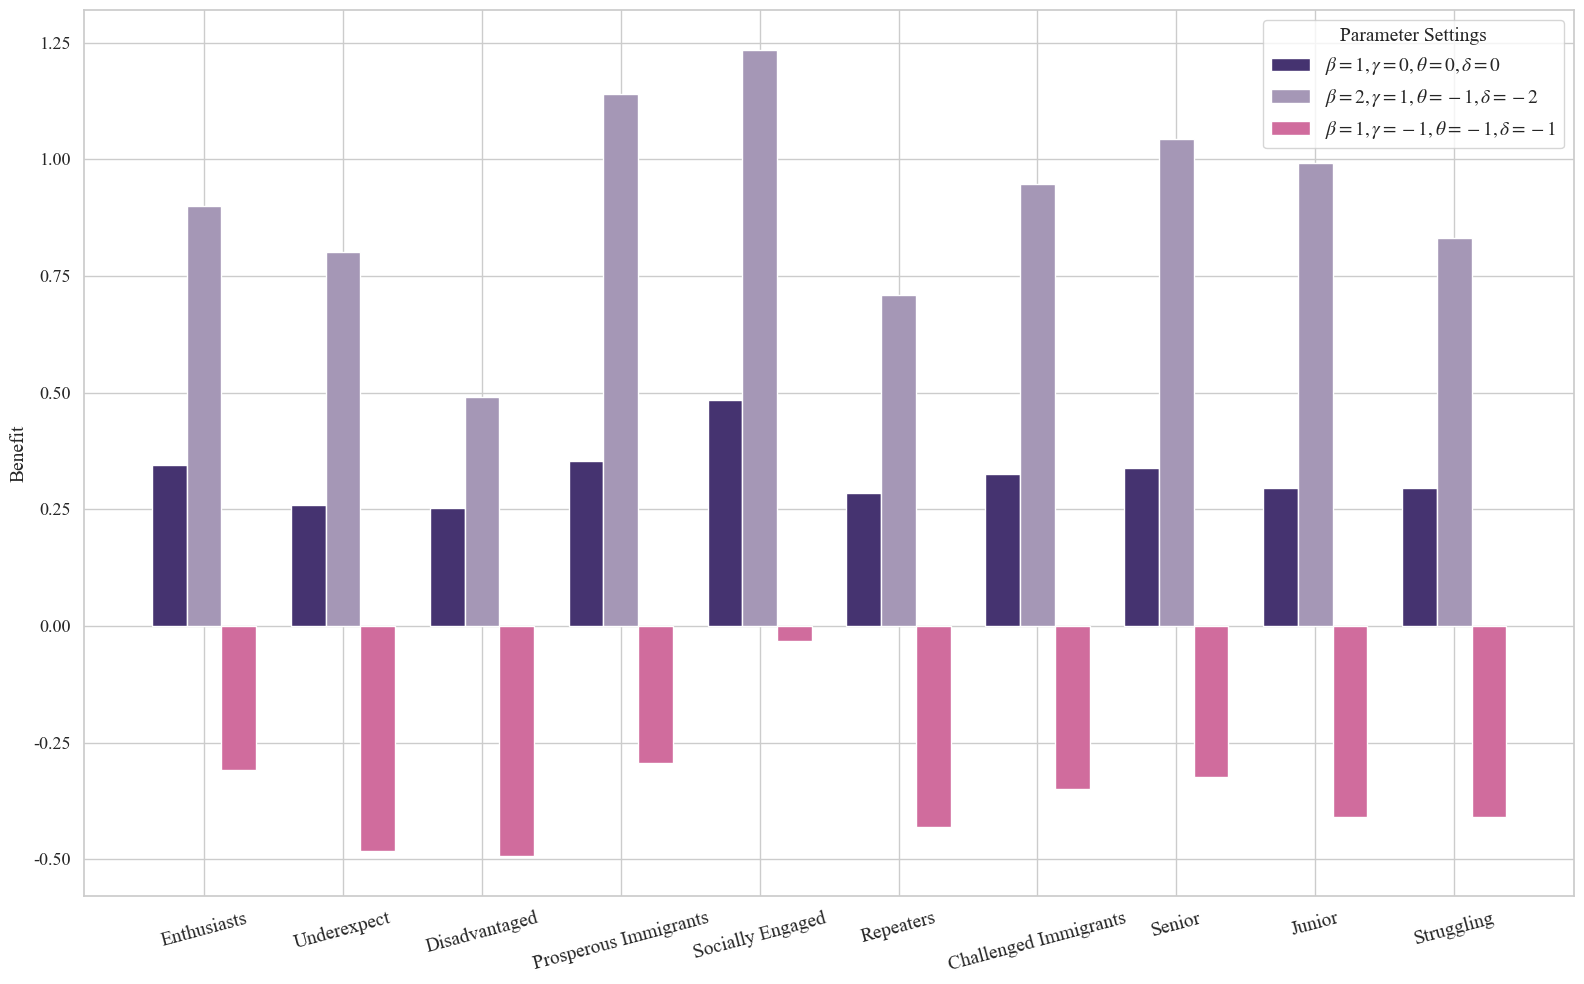

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

# 设置使用Times New Roman字体
rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rcParams['mathtext.fontset'] = 'stix'  # 用于更好的数学字体渲染

# Assuming previous code context
# results = [np.random.rand(2) for _ in range(10)]  # Placeholder: 10 pairs of random probabilities
bin_labels = ['Enthusiasts', 'Underexpect', 'Disadvantaged', 'Prosperous Immigrants', 'Socially Engaged',
              'Repeaters', 'Challenged Immigrants', 'Senior', 'Junior', 'Struggling']
params = [
    (1, 0, 0, 0),
    (2, 1, -1, -2),
    (1, -1, -1, -1)
]

params_descriptions = [
    f'$\\beta={beta}, \\gamma={gamma}, \\theta={theta}, \\delta={delta}$'  # LaTeX string
    for beta, gamma, theta, delta in params
]

evaluated_results_all = []

for beta, gamma, theta, delta in params:
    evaluated_results = []
    for p_y_x, p_y_x_prime in results:
        evaluated = (beta - theta) * p_y_x + (gamma - beta) * p_y_x_prime + theta
        evaluated_results.append(evaluated)
    evaluated_results_all.append(evaluated_results)

# 从0-255到0-1范围内的颜色转换
colors = [
    (69/255, 51/255, 112/255), # 暗紫色
    (165/255, 151/255, 182/255), # 浅紫色
    (208/255, 108/255, 157/255) # 粉红色
]


# Plotting with adjusted x-axis labels
plt.figure(figsize=(16, 10))
width = 0.25  # Width of the bars
x = np.arange(len(bin_labels))  # the label locations

for i, (evaluated_results, desc) in enumerate(zip(evaluated_results_all, params_descriptions)):
    plt.bar(x + i*width, evaluated_results, width, color = colors[i], label=desc)

plt.ylabel('Benefit', fontsize=14)
plt.xticks(x + width, bin_labels, rotation=15, fontsize=14)  # Rotate and align labels
plt.legend(title='Parameter Settings', title_fontsize=14, fontsize=14)
# 调整y轴刻度字体大小
plt.yticks(fontsize=13)

plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.show()
